<a href="https://colab.research.google.com/github/Leorasaharia/neuro-olfactive/blob/main/Perfume_Response_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("minahilfatima12328/perfume-response-analysis")

print("Path to dataset files:", path)

100%|██████████| 3.57k/3.57k [00:00<00:00, 2.51MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/minahilfatima12328/perfume-response-analysis/versions/1


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os

df = pd.read_csv(os.path.join(path, "perfume_Brainfunc.csv"))
df.head()

,S. No.,Odorant Materials,EEG Wave Changes,Brain Functions,Reference
0,1.0,Galaxolide,Alpha decreased.,Odors produce divided attention even when unde...,[74]
1,2.0,m-Xylene,Alpha increased.,Stimulating and excitatory effects.,[75]
2,3.0,"Birch tar, galbanum, heliotropine, jasmine, la...","Increased theta for birch tar, jasmine, lavend...",Subjects differed in their subjective response...,[80]
3,4.0,"5-α-Androstan-3-one, bangalol, white sapphire,...",Alpha increased.,From more anterior electrodes—related to psych...,[70]
4,5.0,Phenylethyl alcohol and valeric acid,Valeric acid—alpha 2 increased.,Unpleasant odor leads to a cortical deactivation.,[76]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S. No.             42 non-null     float64
 1   Odorant Materials  42 non-null     object 
 2   EEG Wave Changes   42 non-null     object 
 3   Brain Functions    42 non-null     object 
 4   Reference          42 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.8+ KB


In [ ]:
df.describe(include="all")

,S. No.,Odorant Materials,EEG Wave Changes,Brain Functions,Reference
count,42.000000,42,42,42,42
unique,NaN,41,41,42,42
top,NaN,Lavender and rosemary,Alpha increased.,Odors produce divided attention even when unde...,[74]
freq,NaN,2,2,1,1
mean,21.500000,NaN,NaN,NaN,NaN
std,12.267844,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,11.250000,NaN,NaN,NaN,NaN
50%,21.500000,NaN,NaN,NaN,NaN
75%,31.750000,NaN,NaN,NaN,NaN


In [ ]:
df["Neuro_Text"] = df["EEG Wave Changes"] + " " + df["Brain Functions"]
df[["Odorant Materials", "Neuro_Text"]].head()


,Odorant Materials,Neuro_Text
0,Galaxolide,Alpha decreased. Odors produce divided attenti...
1,m-Xylene,Alpha increased. Stimulating and excitatory ef...
2,"Birch tar, galbanum, heliotropine, jasmine, la...","Increased theta for birch tar, jasmine, lavend..."
3,"5-α-Androstan-3-one, bangalol, white sapphire,...",Alpha increased. From more anterior electrodes...
4,Phenylethyl alcohol and valeric acid,Valeric acid—alpha 2 increased. Unpleasant odo...


In [ ]:
#text vectorization (cognitive pattern encoding)
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=200
)

X = tfidf.fit_transform(df["Neuro_Text"])

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(df["EEG Wave Changes"])

In [ ]:
#Unsupervised Neuro-Sentiment Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Neuro_Cluster"] = kmeans.fit_predict(X)

df[["Odorant Materials", "Neuro_Cluster"]].head()

#Example cluster meaning (interpretative layer):
#Cluster 0 → Relaxation / Sedation
#Cluster 1 → Alertness / Cognitive activation
#Cluster 2 → Emotional pleasure / Well-being
#Cluster 3 → Stress modulation / Focus

,Odorant Materials,Neuro_Cluster
0,Galaxolide,3
1,m-Xylene,0
2,"Birch tar, galbanum, heliotropine, jasmine, la...",2
3,"5-α-Androstan-3-one, bangalol, white sapphire,...",2
4,Phenylethyl alcohol and valeric acid,0


In [ ]:
state_map = {
    "Relaxation / Sleep": "CALM",
    "Stress Reduction / Focus": "FOCUS",
    "Alertness / Energy": "ENERGY",
    "Emotional Well-being": "PLEASURE"
}

df

,S. No.,Odorant Materials,EEG Wave Changes,Brain Functions,Reference,eeg_alpha,eeg_beta,eeg_theta,eeg_gamma,hrv_rmssd,gsr_level,face_valence,face_arousal,voice_stress,voice_energy
0,1.0,Galaxolide,Alpha decreased.,Odors produce divided attention even when unde...,[74],0.499632,0.227511,0.448786,0.854412,24.077514,8.456640,0.702273,0.127061,0.855461,0.814468
1,2.0,m-Xylene,Alpha increased.,Stimulating and excitatory effects.,[75],0.960571,0.927456,0.460147,0.888584,79.089294,10.532480,-0.366156,0.522243,0.703658,0.281855
2,3.0,"Birch tar, galbanum, heliotropine, jasmine, la...","Increased theta for birch tar, jasmine, lavend...",Subjects differed in their subjective response...,[80],0.785595,0.407024,0.783685,0.205562,87.756436,9.953438,-0.661015,0.769994,0.474174,0.118165
3,4.0,"5-α-Androstan-3-one, bangalol, white sapphire,...",Alpha increased.,From more anterior electrodes—related to psych...,[70],0.678927,0.730018,0.710046,0.608598,21.658783,3.751905,0.113603,0.215821,0.097834,0.696737
4,5.0,Phenylethyl alcohol and valeric acid,Valeric acid—alpha 2 increased.,Unpleasant odor leads to a cortical deactivation.,[76],0.324815,0.449369,0.909770,0.533929,71.209306,10.826599,0.872310,0.622890,0.491616,0.628943
5,6.0,Lavender and rosemary,Lavender—beta increased. Rosemary—frontal alph...,Lavender—increased drowsiness. Rosemary—increa...,[9],0.324796,0.616054,0.577772,0.377686,42.649578,3.940112,0.392060,0.085347,0.473472,0.877472
6,7.0,"Synthetic odors—almond, chocolate, spearmint, ...",Chocolate odor—less theta activity.,Reduced level of attention.,[59],0.246467,0.637368,0.295675,0.295892,84.517279,5.218296,0.140122,0.051682,0.173202,0.735071
7,8.0,Chewing of marketed gum,Alpha power increased.,Arousal psychosomatic responses.,[77],0.892941,0.347884,0.770596,0.470092,37.436643,11.324125,-0.805647,0.531355,0.433852,0.803481
8,9.0,"Valeriana off, Lavandula off, Passiflora incar...",Valerian extract—delta and theta activity incr...,Self-rated tiredness increased under some of t...,[13],0.680892,0.975668,0.808628,0.954328,89.093774,9.919677,0.230014,0.540635,0.398505,0.282035
9,10.0,"(R)-(−)-, (S)-(+)- and (RS)-(±)-forms of linal...",(RS)-(±)-linalool—greater decrease of the beta...,(RS)-(±)-linalool and (R)-(−)-linalool -favora...,[88],0.766458,0.820106,0.649022,0.458562,58.673535,12.813739,0.980108,0.637430,0.615850,0.177440


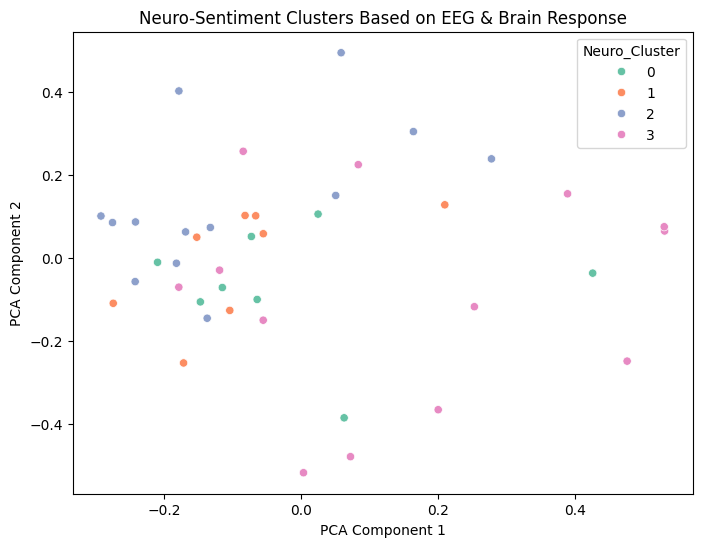

In [ ]:
#visualization layer (explainable AI)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df["Neuro_Cluster"],
    palette="Set2"
)
plt.title("Neuro-Sentiment Clusters Based on EEG & Brain Response")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
#Mapping Clusters to Human Tendencies
cluster_map = {
    0: "Relaxation / Sleep",
    1: "Alertness / Energy",
    2: "Emotional Well-being",
    3: "Stress Reduction / Focus"
}

df["Human_Tendency"] = df["Neuro_Cluster"].map(cluster_map)
df[["Odorant Materials", "Human_Tendency"]]

,Odorant Materials,Human_Tendency
0,Galaxolide,Stress Reduction / Focus
1,m-Xylene,Relaxation / Sleep
2,"Birch tar, galbanum, heliotropine, jasmine, la...",Emotional Well-being
3,"5-α-Androstan-3-one, bangalol, white sapphire,...",Emotional Well-being
4,Phenylethyl alcohol and valeric acid,Relaxation / Sleep
5,Lavender and rosemary,Emotional Well-being
6,"Synthetic odors—almond, chocolate, spearmint, ...",Stress Reduction / Focus
7,Chewing of marketed gum,Emotional Well-being
8,"Valeriana off, Lavandula off, Passiflora incar...",Emotional Well-being
9,"(R)-(−)-, (S)-(+)- and (RS)-(±)-forms of linal...",Relaxation / Sleep


In [ ]:
#AI-Based Prediction Model (Proof of Feasibility)
encoder = LabelEncoder()
y = encoder.fit_transform(df["Human_Tendency"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=encoder.classes_))

                          precision    recall  f1-score   support

      Alertness / Energy       0.00      0.00      0.00         3
    Emotional Well-being       0.00      0.00      0.00         1
      Relaxation / Sleep       0.00      0.00      0.00         2
Stress Reduction / Focus       0.75      1.00      0.86         3

                accuracy                           0.33         9
               macro avg       0.19      0.25      0.21         9
            weighted avg       0.25      0.33      0.29         9



In [ ]:
#NLP Vectorization (Olfactive + EEG Semantics)
text_features = df["Odorant Materials"] + " " + df["EEG Wave Changes"]

vectorizer = TfidfVectorizer(
    max_features=300,
    ngram_range=(1,2),
    stop_words="english"
)

X = vectorizer.fit_transform(text_features)
y = df["Human_Tendency"]

In [ ]:
#train-test splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [ ]:
#applying logistic regression for the baseline explainable model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Create a LabelEncoder specifically for the 'Human_Tendency' labels
# This ensures target_names match the actual labels in y_test/y_pred
# and resolves the AttributeError if 'encoder' from previous cells is not correctly set.
current_encoder = LabelEncoder()
current_encoder.fit(y_train) # Fit on y_train which contains unique Human_Tendency strings

print(classification_report(
    y_test,
    y_pred,
    target_names=current_encoder.classes_
))

                          precision    recall  f1-score   support

      Alertness / Energy       0.00      0.00      0.00         2
    Emotional Well-being       0.12      0.33      0.18         3
      Relaxation / Sleep       0.00      0.00      0.00         2
Stress Reduction / Focus       0.50      0.25      0.33         4

                accuracy                           0.18        11
               macro avg       0.16      0.15      0.13        11
            weighted avg       0.22      0.18      0.17        11



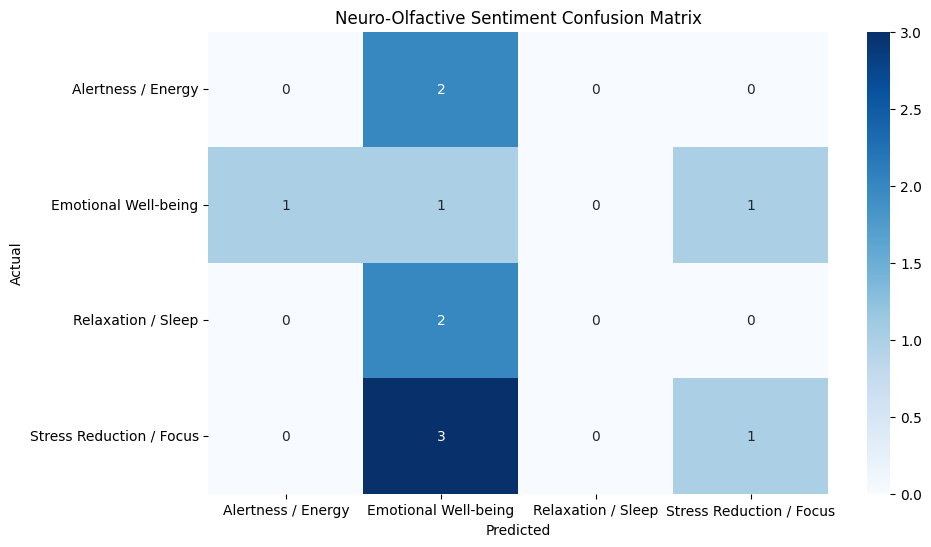

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=current_encoder.classes_,
            yticklabels=current_encoder.classes_,
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neuro-Olfactive Sentiment Confusion Matrix")
plt.show()

In [ ]:
#XGBoost (Advanced Non-Linear Model)

# Re-encode y using a new LabelEncoder for 'Human_Tendency' strings
current_xgb_encoder = LabelEncoder()
y_encoded = current_xgb_encoder.fit_transform(y)

# Get original indices
indices = np.arange(len(y_encoded))

# Split the data and original indices consistently
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y_encoded, indices, test_size=0.25, random_state=42, stratify=y_encoded
)

xgb_model = XGBClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=len(current_xgb_encoder.classes_) # Use the classes from the new encoder
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(
    y_test,
    y_pred_xgb,
    target_names=current_xgb_encoder.classes_ # Use the classes from the new encoder for target names
))

                          precision    recall  f1-score   support

      Alertness / Energy       0.25      0.50      0.33         2
    Emotional Well-being       0.20      0.33      0.25         3
      Relaxation / Sleep       0.00      0.00      0.00         2
Stress Reduction / Focus       0.50      0.25      0.33         4

                accuracy                           0.27        11
               macro avg       0.24      0.27      0.23        11
            weighted avg       0.28      0.27      0.25        11



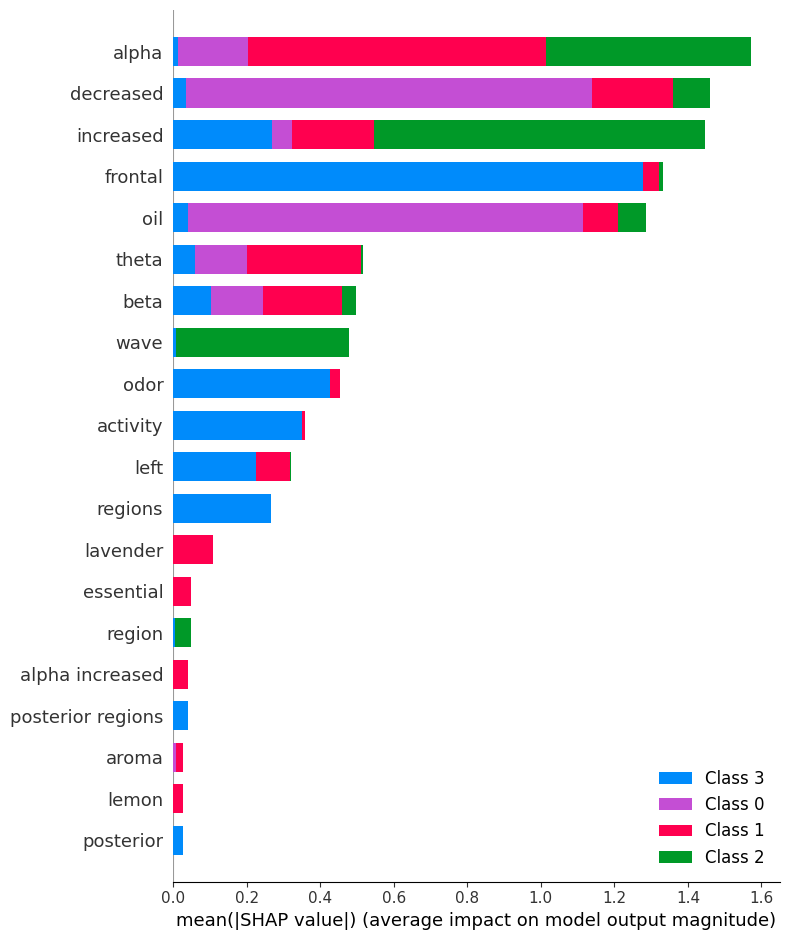

In [ ]:
import shap

#SHAP Explainability (AI predicts certain emotional states — critical for ethics & inclusivity.)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, feature_names=vectorizer.get_feature_names_out())

In [ ]:
#TensorFlow Neural Network (Mood Prediction Engine)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_nn = Sequential([
    Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(len(current_xgb_encoder.classes_), activation="softmax")
])

model_nn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,044 (183.77 KB)

 Trainable params: 47,044 (183.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_nn.fit(
    X_train.toarray(),
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=8,
    verbose=1
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 424ms/step - accuracy: 0.1719 - loss: 1.3969 - val_accuracy: 0.1429 - val_loss: 1.3936
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.2604 - loss: 1.3881 - val_accuracy: 0.1429 - val_loss: 1.3888
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.4271 - loss: 1.3648 - val_accuracy: 0.2857 - val_loss: 1.3842
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4635 - loss: 1.3515 - val_accuracy: 0.2857 - val_loss: 1.3811
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4896 - loss: 1.3256 - val_accuracy: 0.2857 - val_loss: 1.3792
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5156 - loss: 1.3145 - val_accuracy: 0.2857 - val_loss: 1.3770
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.3490 - loss: 1.3094 - val_accuracy: 0.2857 - val_loss: 1.3756
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5156 - loss: 1.2845 - val_accuracy: 0.2857 - val_loss: 1.3

In [ ]:
#Model Evaluation (Neural)
loss, acc = model_nn.evaluate(X_test.toarray(), y_test)
print(f"Test Accuracy: {acc:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0909 - loss: 1.3840
Test Accuracy: 0.09


In [ ]:
predicted_states = current_xgb_encoder.inverse_transform(y_pred_xgb)

df_results = pd.DataFrame({
    "Odorant": df.iloc[test_indices]["Odorant Materials"].values,
    "Predicted Brain State": predicted_states
})

df_results.head()
#Business Interpretation Layer

,Odorant,Predicted Brain State
0,Lavender and rosemary,Alertness / Energy
1,Ylang–ylang essential oil,Emotional Well-being
2,Galaxolide,Emotional Well-being
3,"Lemon, peppermint, and vanilla",Emotional Well-being
4,Phenylethyl alcohol and valeric acid,Emotional Well-being
